# HW3

Welcome to HW3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1

Write a function that incorporates all of the optimization techniques we have learned so far:

    - Gradient Descent
        - plus Momentum
    - SGD
        - plus Momentum
    - MBGD
        - plus Momentum

Write this function below that allows the user to specify which optimization technique the function should employ, and takes in the appropriate hyperparameters for each. 

### "Unified Implementation" Function

In [9]:
# Define the cost function and its gradient
def cost(X, y, w):
    N = X.shape[0]
    return np.linalg.norm(X.dot(w)-y,axis=0)**2/N

def cost_grad(X,y,w):
    N = X.shape[0]
    return (2/N)*(X.T.dot(X).dot(w)-X.T.dot(y))

In [20]:
def unified_gd_momentum(dataset, labels,  delta, optimizer, w_init=None, eta=1e-2,
                        batch_size=5, epochs=5, max_iter=10000,
                        momentum=True, beta=0.9):
    '''
    Unified implementation of GD, MBGD, and Momentum
    For SGD, set batch_size = 1
    '''
    if w_init is None:
        w_init = np.random.rand(dataset.shape[1],1)

    # dataset dimensions
    num_data = dataset.shape[0] # number of data points
    dim_data = dataset.shape[1] # the shape of our X vector (how many weights are in our w_init) 

    # for plotting: save weights
    weights_list = []
    cost_list = []

    # reshape w_init to be a column vector
    w_init = np.asarray(w_init).reshape(dim_data,1)

    # hyperparameters for stop criteria
    delta = 1e-5

    # initialize variables for stop criteria
    delta_w = 1

    # do first update of weights
    w_old = w_init

    if optimizer == 'GD':

        # init z, for momentum
        z_old = 0

        # Start GD Loop
        for iter in range(max_iter):

                # compute gradient
                grad = cost_grad(dataset, labels, w_old)
                
                if momentum is True:
                    # compute momentum
                    z_new = beta * z_old + grad
                else:
                    z_new = grad
                
                # update weights
                w_new = w_old - eta * z_new
                
                # save weights and costs for plotting
                weights_list.append(w_new)
                cost_list.append(cost(dataset, labels, w_new))

                # update stop criteria variables
                delta_w = np.linalg.norm(w_new - w_old)

                # previous weights to current weights
                w_old = w_new
                z_old = z_new

                # check stop criteria at the end of the epoch
                if delta_w < delta:
                    break


        # get rid of extra dimensions in weights/costs list for easy plotting
        weights_list = np.squeeze(np.asarray(weights_list))
        cost_list = np.squeeze(np.asarray(cost_list))

        print(f"Terminating GD after {iter} iterations with weight change of {delta_w}")

        return w_new, weights_list, cost_list
    

    
    elif optimizer == 'MBGD':
        # calculate number of batches in our dataset - number of data points divided by batch_size
        num_batches = int(num_data/batch_size)
        

        # init z, for momentum
        z_old = 0

        # Start SGD Loop
        for epoch in range(epochs):
            # shuffle data (by shuffling indices)
            indices = np.random.permutation(num_data)
            shuffled_data = dataset[indices, :]
            shuffled_labels = labels[indices, :]

            
            
            # loop over all batches
            for batch_num in range(num_batches):
                # get current batch
                batch_start = batch_num * batch_size
                batch_end = (batch_num * batch_size) + batch_size
                batch = shuffled_data[batch_start : batch_end, :]
                batch_labels = shuffled_labels[batch_start : batch_end, :]

                # compute gradient
                grad = cost_grad(batch, batch_labels, w_old)
            

                if momentum is not None:
                    # compute momentum
                    z_new = beta * z_old + grad
                else:
                    z_new = grad
                

                # update weights
                w_new = w_old - eta * z_new
                
                
                
                # save weights and costs for plotting
                weights_list.append(w_new)
                cost_list.append(cost(batch,batch_labels, w_new))

                # update stop criteria variables
                delta_w = np.linalg.norm(w_new - w_old)
                

                # previous weights to current weights
                w_old = w_new
                z_old = z_new

            # check stop criteria at the end of the epoch
            if delta_w < delta:
                break

    # get rid of extra dimensions in weights/costs list for easy plotting
    weights_list = np.squeeze(np.asarray(weights_list))
    cost_list = np.squeeze(np.asarray(cost_list))

    print(f"Terminating MBGD after {epoch} epochs with weight change of {delta_w}")

    return w_new, weights_list, cost_list
    


### Generate Data for testing

In [5]:
# define our true function
f = lambda x: 3.5*x + 2

In [6]:
# set up function to simulate data

# this function can simulate multidimensional data 
# default to 2 dimensions, 100 points
def simulation(f, dims = 2, N = 100):
    x = np.linspace(-2,2,N) # x values
    y = f(x) + np.random.randn(N) # adding our noise
    y = y[:,np.newaxis] # adding a dimension

    # initialize X as vector of 1s (x^0)
    X = x[:, np.newaxis]**0

    # loop to add each x
    for i in range(1, dims):
        X = np.hstack((X, x[:,np.newaxis]**i))

    return x,X,y

In [7]:
x, X, y = simulation(f)

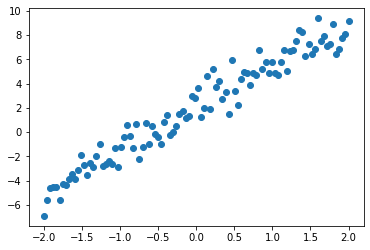

In [8]:
plt.scatter(x,y)

### Test the function on this simulated dataset

#### First, run Vanilla Gradient Descent without and with Momentum

In [25]:
w_gd_m, wPath_gd_m, cPath_gd_m = unified_gd_momentum(X, y, delta=1e-3, optimizer='GD', 
                                                     eta=1e-2, max_iter=10000, 
                                                     momentum=True, beta=0.9)

w_gd, wPath_gd, cPath_gd = unified_gd_momentum(X, y, delta=1e-3, optimizer='GD', 
                                                     eta=1e-2, max_iter=10000, 
                                                     momentum=False)

Terminating GD after 192 iterations with weight change of 9.566389770284544e-06
Terminating GD after 407 iterations with weight change of 9.819848021927586e-06


Text(0.5, 0, 'Iteration')

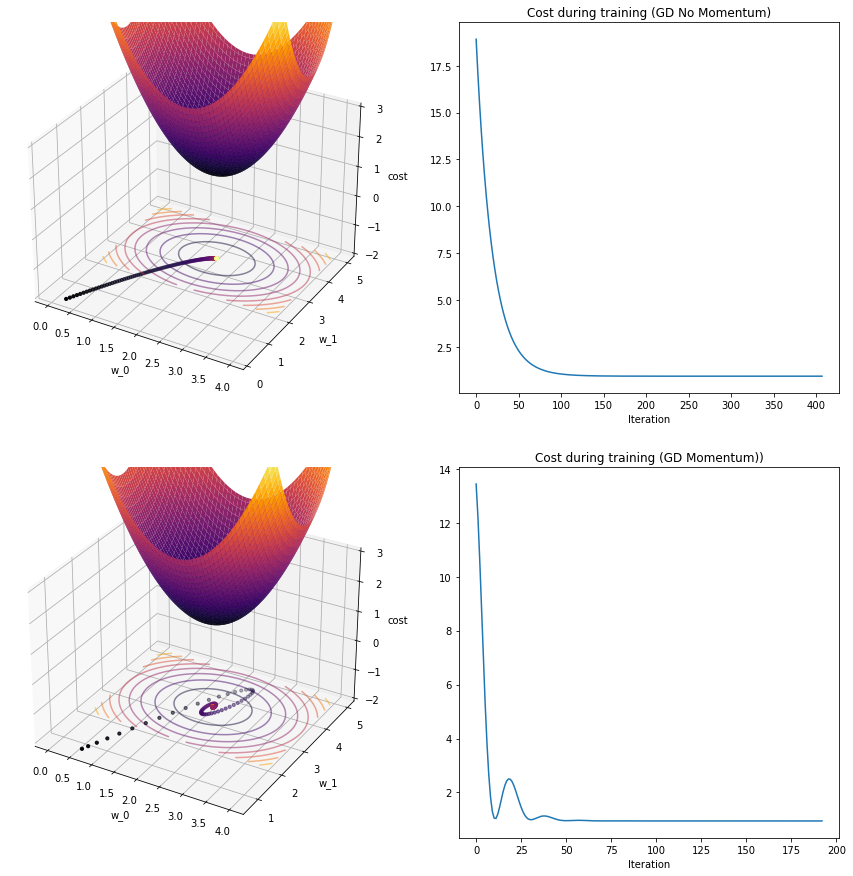

In [28]:
# plotting 
len_w = 100
w_0 = np.linspace(0,4,len_w)
w_1 = np.linspace(2,5,len_w)
W_0, W_1 = np.meshgrid(w_0, w_1)

colorer = range(len(wPath_gd))
colorer_m = range(len(wPath_gd_m))

# combine and reshape mesh for calculation
wgrid = np.array([W_0,W_1]).reshape(2, len(w_0)**2)

# calculate on grid, and reshape back for plotting
costs = cost(X,y,wgrid).reshape(W_0.shape)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_gd[:,0],wPath_gd[:,1],-2,s=10,c=colorer,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(222)
ax2.plot(cPath_gd)
ax2.set_title("Cost during training (GD No Momentum)")
ax2.set_xlabel("Iteration")

ax1 = fig.add_subplot(223,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_gd_m[:,0],wPath_gd_m[:,1],-2,s=10,c=colorer_m,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(224)
ax2.plot(cPath_gd_m)
ax2.set_title("Cost during training (GD Momentum))")
ax2.set_xlabel("Iteration")

#### Second, run Stochastic Gradient Descent without and with Momentum

In [35]:
w_sgd_m, wPath_sgd_m, cPath_sgd_m = unified_gd_momentum(X, y, delta=1e-3, optimizer='MBGD',
                                                        batch_size=1, epochs=5,eta=2e-3,
                                                        momentum=True, beta=0.9)

w_sgd, wPath_sgd, cPath_sgd = unified_gd_momentum(X, y, delta=1e-3, optimizer='MBGD', 
                                                     batch_size=1, epochs=5,eta=2e-3,
                                                     momentum=False)

Terminating MBGD after 4 epochs with weight change of 0.0066523753339112045
Terminating MBGD after 4 epochs with weight change of 0.008218293025550338


Text(0.5, 0, 'Iteration')

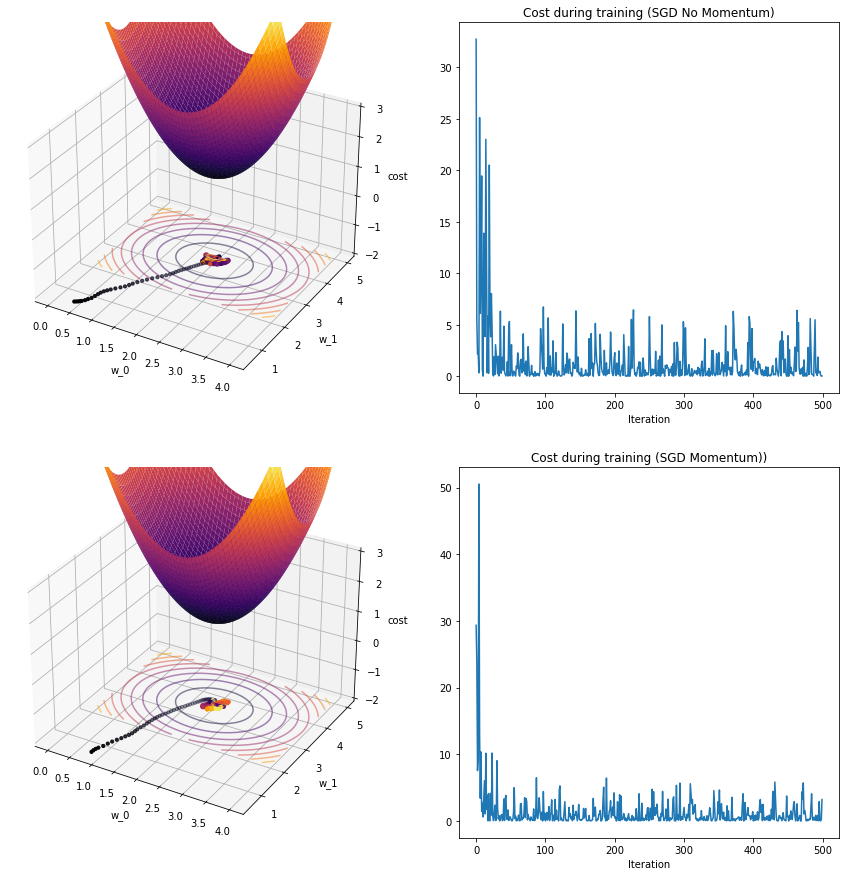

In [36]:
# plotting 
len_w = 100
w_0 = np.linspace(0,4,len_w)
w_1 = np.linspace(2,5,len_w)
W_0, W_1 = np.meshgrid(w_0, w_1)

colorer = range(len(wPath_sgd))
colorer_m = range(len(wPath_sgd_m))

# combine and reshape mesh for calculation
wgrid = np.array([W_0,W_1]).reshape(2, len(w_0)**2)

# calculate on grid, and reshape back for plotting
costs = cost(X,y,wgrid).reshape(W_0.shape)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_sgd[:,0],wPath_sgd[:,1],-2,s=10,c=colorer,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(222)
ax2.plot(cPath_sgd)
ax2.set_title("Cost during training (SGD No Momentum)")
ax2.set_xlabel("Iteration")

ax1 = fig.add_subplot(223,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_sgd_m[:,0],wPath_sgd_m[:,1],-2,s=10,c=colorer_m,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(224)
ax2.plot(cPath_sgd_m)
ax2.set_title("Cost during training (SGD Momentum))")
ax2.set_xlabel("Iteration")

#### Third, run Mini Batch Gradient Descent without and with Momentum

In [39]:
w_mbgd_m, wPath_mbgd_m, cPath_mbgd_m = unified_gd_momentum(X, y, delta=1e-3, optimizer='MBGD',
                                                        batch_size=5, epochs=5,eta=1e-2,
                                                        momentum=True, beta=0.9)

w_mbgd, wPath_mbgd, cPath_mbgd = unified_gd_momentum(X, y, delta=1e-3, optimizer='MBGD', 
                                                     batch_size=5, epochs=5,eta=1e-2,
                                                     momentum=False)

Terminating MBGD after 4 epochs with weight change of 0.02019007821751699
Terminating MBGD after 4 epochs with weight change of 0.043487340947072795


Text(0.5, 0, 'Iteration')

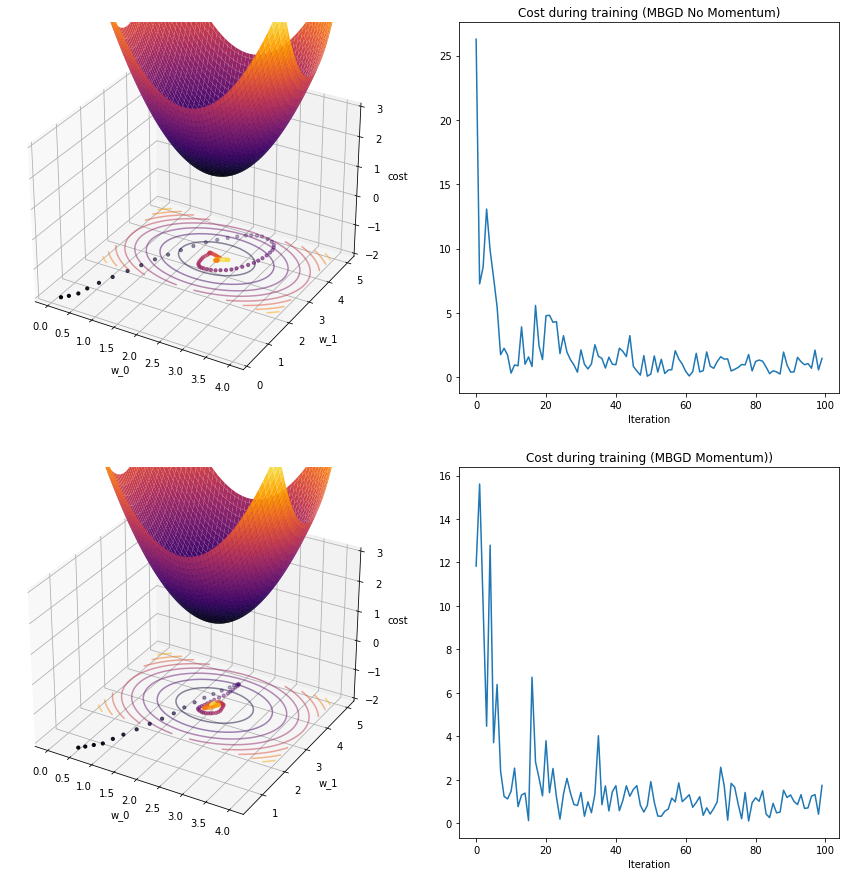

In [40]:
# plotting 
len_w = 100
w_0 = np.linspace(0,4,len_w)
w_1 = np.linspace(2,5,len_w)
W_0, W_1 = np.meshgrid(w_0, w_1)

colorer = range(len(wPath_mbgd))
colorer_m = range(len(wPath_mbgd_m))

# combine and reshape mesh for calculation
wgrid = np.array([W_0,W_1]).reshape(2, len(w_0)**2)

# calculate on grid, and reshape back for plotting
costs = cost(X,y,wgrid).reshape(W_0.shape)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_mbgd[:,0],wPath_mbgd[:,1],-2,s=10,c=colorer,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(222)
ax2.plot(cPath_mbgd)
ax2.set_title("Cost during training (MBGD No Momentum)")
ax2.set_xlabel("Iteration")

ax1 = fig.add_subplot(223,projection='3d')
ax1.set_xlabel('w_0')
ax1.set_ylabel('w_1')
ax1.set_zlabel('cost')
ax1.set_zlim([-2,3])
ax1.scatter(wPath_mbgd_m[:,0],wPath_mbgd_m[:,1],-2,s=10,c=colorer_m,cmap='inferno')
ax1.plot_surface(W_0, W_1, costs,cmap='inferno')
ax1.contour(W_0, W_1, costs, cmap='inferno', offset=-2,levels=10,alpha=0.5)

ax2 = fig.add_subplot(224)
ax2.plot(cPath_mbgd_m)
ax2.set_title("Cost during training (MBGD Momentum))")
ax2.set_xlabel("Iteration")

## Problem 2
As mentioned at the end of our Optimization notebooks, as a data scientist, you will be expected to keep up to date with recent algorithms and methods. Look into at least two of these methods, summarize them below, and _list your sources for the information you found_. 

_EXTRA CREDIT:_ implement code for these algorithms as well!

- ADAGrad
- ADA-Delta
- Ada-Max
- AMSGrad

### Descriptions of New Methods:

### ADAGrad

Indeed, the parameter update formula for ADAGrad is given as:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \frac{\eta}{\sqrt{G_t + \epsilon}} \times \text{grad}
$$

Here, $G_t= G_{t-1} + \text{grad}^2$ represents the sum of the squares of past gradients, $\text{grad}$ represents the current gradient, $\eta$ is the learning rate, and $\epsilon$ is a small constant to prevent division by zero.

### AdaDelta

For AdaDelta, the parameter update is calculated as:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \frac{\sqrt{\Delta \mathbf{w}_{\text{old}} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \times \text{grad}
$$

Here, $E[g^2]_t = \rho \times E[g^2]_{t-1} + (1 - \rho) \times \text{grad}^2$ is the decaying average of past squared gradients, and $\Delta \mathbf{w}_{\text{old}}$ is the decaying average of past squared parameter updates.

### Adamax

In Adamax, the parameter update is expressed as:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \frac{\eta}{u_t} \times m_t
$$

Here, $u_t = \max(\beta_2 \times u_{t-1}, |g_t|)$ , $m_t= \beta_1 \times m_{t-1} + (1 - \beta_1) \times \text{grad}$ is the first moment estimate, and $\beta_2$ is the exponential decay rate for the infinity norm.

### AMSGrad

For AMSGrad, the update formula has an adjusted denominator:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \frac{\eta \times m_t}{\sqrt{v_t^{\text{max}} + \epsilon}}
$$

Here, $m_t= \beta_1 \times m_{t-1} + (1 - \beta_1) \times \text{grad}$ and $v_t = \beta_2 \times v_{t-1} + (1 - \beta_2) \times \text{grad}^2$ are the moving averages of the gradients, and $v_t^{\text{max}}$ is the maximum $v_t$ observed thus far.


### Sources:

### ADAGrad
- Original Paper: ["Adaptive Subgradient Methods for Online Learning and Stochastic Optimization"](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf) by John Duchi, Elad Hazan, and Yoram Singer.
  
### AdaDelta
- Original Paper: ["ADADELTA: An Adaptive Learning Rate Method"](https://arxiv.org/abs/1212.5701) by Matthew D. Zeiler.

### Adamax
- Original Paper: ["Adam: A Method for Stochastic Optimization"](https://arxiv.org/abs/1412.6980) by Diederik P. Kingma and Jimmy Ba. (Adamax is a variant described in the same paper.)

### AMSGrad
- Original Paper: ["On the Convergence of Adam and Beyond"](https://openreview.net/forum?id=ryQu7f-RZ) by Suvrit Sra, Sashank J. Reddi, Satyen Kale, and Sanjiv Kumar.


## Problem 3

Code a simple neural network forward pass according to the diagram below:



 I have supplied a revised version of the  ```simple_dataset``` function so that it returns a dataset with two features. Use this to simulate your data, then feed it through a randomized network. Your code can use either a non-vectorized or vectorized version of the network, whichever your prefer to explore here.  

 ![](./hw3-nn-fig.png)  

In [2]:
# simulate data

def simple_dataset(N=1000):
    # Generate two features for each data point
    feature1 = np.linspace(-5, 5, N).reshape(N, 1)
    feature2 = np.random.uniform(-5, 5, N).reshape(N, 1)
    
    # Generate labels 
    labels = ((feature1 * feature2 > 0).astype(int)*2-1).reshape(N, 1)
    
    return feature1, feature2, labels


In [3]:
input1, input2, labels = simple_dataset()

In [4]:
combined_input = np.hstack((input1, input2))

#### Here I create a simple 3 fully-connected layer neural network, where the first and second hidden layers both have 4 nodes, the third hidden layer has 3 nodes.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def simple_network_vectorized(combined_input):
    outputs = []
    num_data = combined_input.shape[0]

    # initialize weight matrices - notice the dimensions
    W_1 = np.random.randn(4,2)
    W_2 = np.random.randn(4,4)
    W_3 = np.random.randn(3,4)
    W_4 = np.random.randn(1,3)

    # initialize bias vectors
    b_1 = np.random.randn(4,1)
    b_2 = np.random.randn(4,1)
    b_3 = np.random.randn(3,1)
    b_4 = np.random.randn(1,1)
    
    # loop through training data
    for i in range(num_data):
        
        # get data point
        input = combined_input[i,:]
        
        # layer 1 - sigmoid of weights times input plus bias
        a_1 = sigmoid(W_1.dot(input.reshape(-1,1)) + b_1)
        # print(a_1, a_1.shape)

        # layer 2 - sigmoid of weights times a_1 plus bias
        a_2 = sigmoid(W_2.dot(a_1) + b_2)
        # print(a_2, a_2.shape)

        # layer 3 - sigmoid of weights times a_2 plus bias
        a_3 = sigmoid(W_3.dot(a_2) + b_3)
        # print(a_3, a_3.shape)

        # output layer
        output = sigmoid(W_4.dot(a_3) + b_4)
        # print(output, output.shape)
        
        # append to form output
        outputs.append(output)
    
    return np.squeeze(np.asarray(outputs)).reshape(-1,1)

In [8]:
estimated_output = simple_network_vectorized(combined_input)